# Correlation

- 상관계수 행렬 구하기 
- 공분산 행렬계산식에서 x-m 을 std dev 로 정규화 해주면 된다. 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

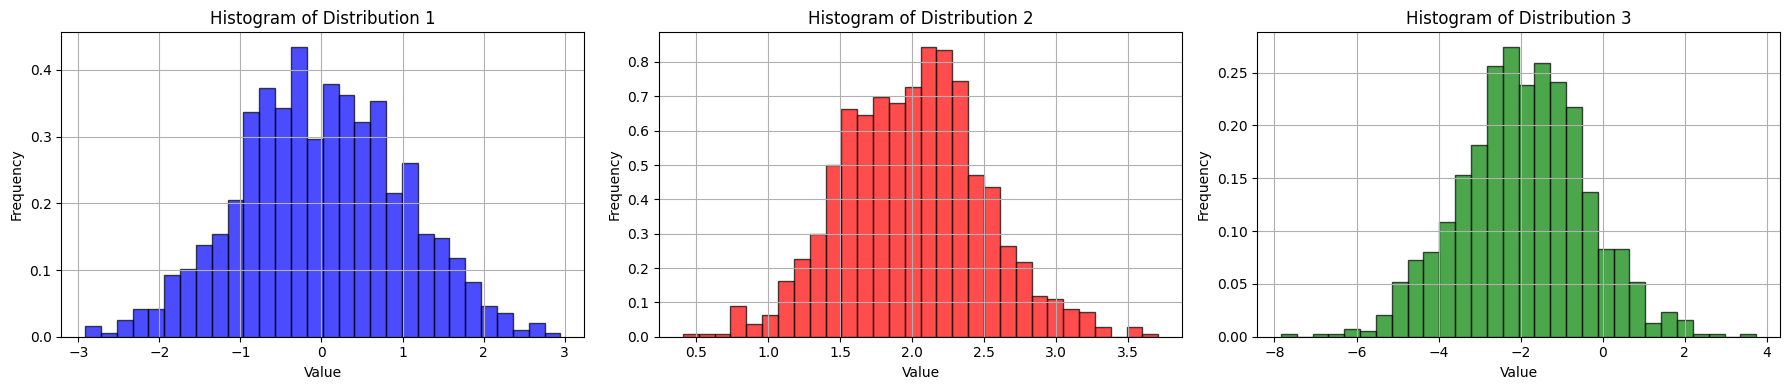

In [2]:
# Parameters for the Gaussian distributions
means = [0, 2, -2]
std_devs = [1, 0.5, 1.5]
sizes = [1000, 1000, 1000]
colors = ['blue', 'red', 'green']
labels = ['Distribution 1', 'Distribution 2', 'Distribution 3']

# Create subplots for each histogram
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

# Generate data for each Gaussian distribution and plot histogram
for i in range(3):
    data = np.random.normal(means[i], std_devs[i], sizes[i])
    axs[i].hist(data, bins=30, density=True, alpha=0.7, color=colors[i], edgecolor='black')
    axs[i].set_title(f'Histogram of {labels[i]}')
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
    axs[i].grid(True)

plt.tight_layout()
plt.show()


In [5]:
# create data 
n_data = len(sizes)
d_c = np.asanyarray( [ np.random.normal( means[i],std_devs[i],sizes[i] ) for i in range(0,n_data)] )

In [8]:
d_c_t = np.transpose(d_c)

In [10]:
d_c_t.shape

(1000, 3)

In [11]:
# Z scaling 
d_c_t[:,0] = (d_c_t[:,0]- np.mean(d_c_t[:,0])) / np.std(d_c_t[:,0])
d_c_t[:,1] = (d_c_t[:,1]- np.mean(d_c_t[:,1])) / np.std(d_c_t[:,1])
d_c_t[:,2] = (d_c_t[:,2]- np.mean(d_c_t[:,2])) / np.std(d_c_t[:,2])

In [14]:
# get correlation matrix 
cor_matrx =  1/(d_c_t.shape[0]) * np.matmul( np.transpose(d_c_t), d_c_t)

In [16]:
cor_matrx

array([[ 1.        , -0.06559775,  0.04283327],
       [-0.06559775,  1.        ,  0.01650698],
       [ 0.04283327,  0.01650698,  1.        ]])

# Sample

In [20]:
def calculate_correlation_matrix():

    np.set_printoptions(precision= 3)
    data = [[2, 20],
            [3, 24],
            [6, 36],
            [8, 47],
            [2.6, 22],
            [4.8, 32],
            [7, 47],
            [4, 42],
            [2, 21],
            [2.2, 21],
            [3.8, 30],
            [2.4, 25],
            [2.6, 18],
            [5.4, 38],
            [5.1, 28]
            ]
    nData = len(data)

    data = np.array(data)
    data = data.T

    x1 = data[0, :]
    x2 = data[1, :]

    z1 = (x1-np.mean(x1))/np.std(x1)
    z2 = (x2-np.mean(x2))/np.std(x2)

    corr = np.corrcoef(x1,x2)
    print('Correlation matrix:\n' ,corr)

    res = np.sum(z1*z2)/nData
    print('Correlation is {:.3f} '.format(res))

if __name__ == '__main__':

    calculate_correlation_matrix()

Correlation matrix:
 [[1.    0.898]
 [0.898 1.   ]]
Correlation is 0.898 
